# Calplot Calendar Heatmap

### Requirements to plot the heatmap
2 columns of data

In [25]:
!pip install calplot

In [3]:
# Imports of Models & libraries. 
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import nltk
import os
import string   
import re
import calmap
import calplot

from datetime import datetime
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from collections import Counter
from nltk import PorterStemmer
from scipy.ndimage import gaussian_gradient_magnitude
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from plotly_calplot import calplot






/Users/vkatsapas/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Creating Heatmaps for Data 

Import data for heatmaps for each city

## London

### Read and Explore Files
Make sure that we have the right datatypes for the heatmaps

In [55]:
# Load the file to a dataframe
# calmap requires a series while calplot requires a dataframe
london_hd = pd.read_csv('london4heatmaps16102022.csv', index_col=False)

In [56]:
# View the dataframe
# Do datatypes need to be changed?

london_hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1651 non-null   int64  
 1   site_id                     1651 non-null   object 
 2   surveydescription           1651 non-null   object 
 3   latitude                    1651 non-null   float64
 4   longitude                   1651 non-null   float64
 5   location                    1651 non-null   object 
 6   borough                     1651 non-null   object 
 7   functional_cycling_area     1651 non-null   object 
 8   survey_year                 1651 non-null   int64  
 9   survey_date                 1651 non-null   object 
 10  weather                     1651 non-null   object 
 11  time                        1651 non-null   object 
 12  period                      1651 non-null   object 
 13  direction                   1651 

In [57]:
# Change to datetype
london_hd = london_hd[['survey_date','Value']]
london_hd['survey_date']= pd.to_datetime(london_hd['survey_date'])
london_hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   survey_date  1651 non-null   datetime64[ns]
 1   Value        1651 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 25.9 KB


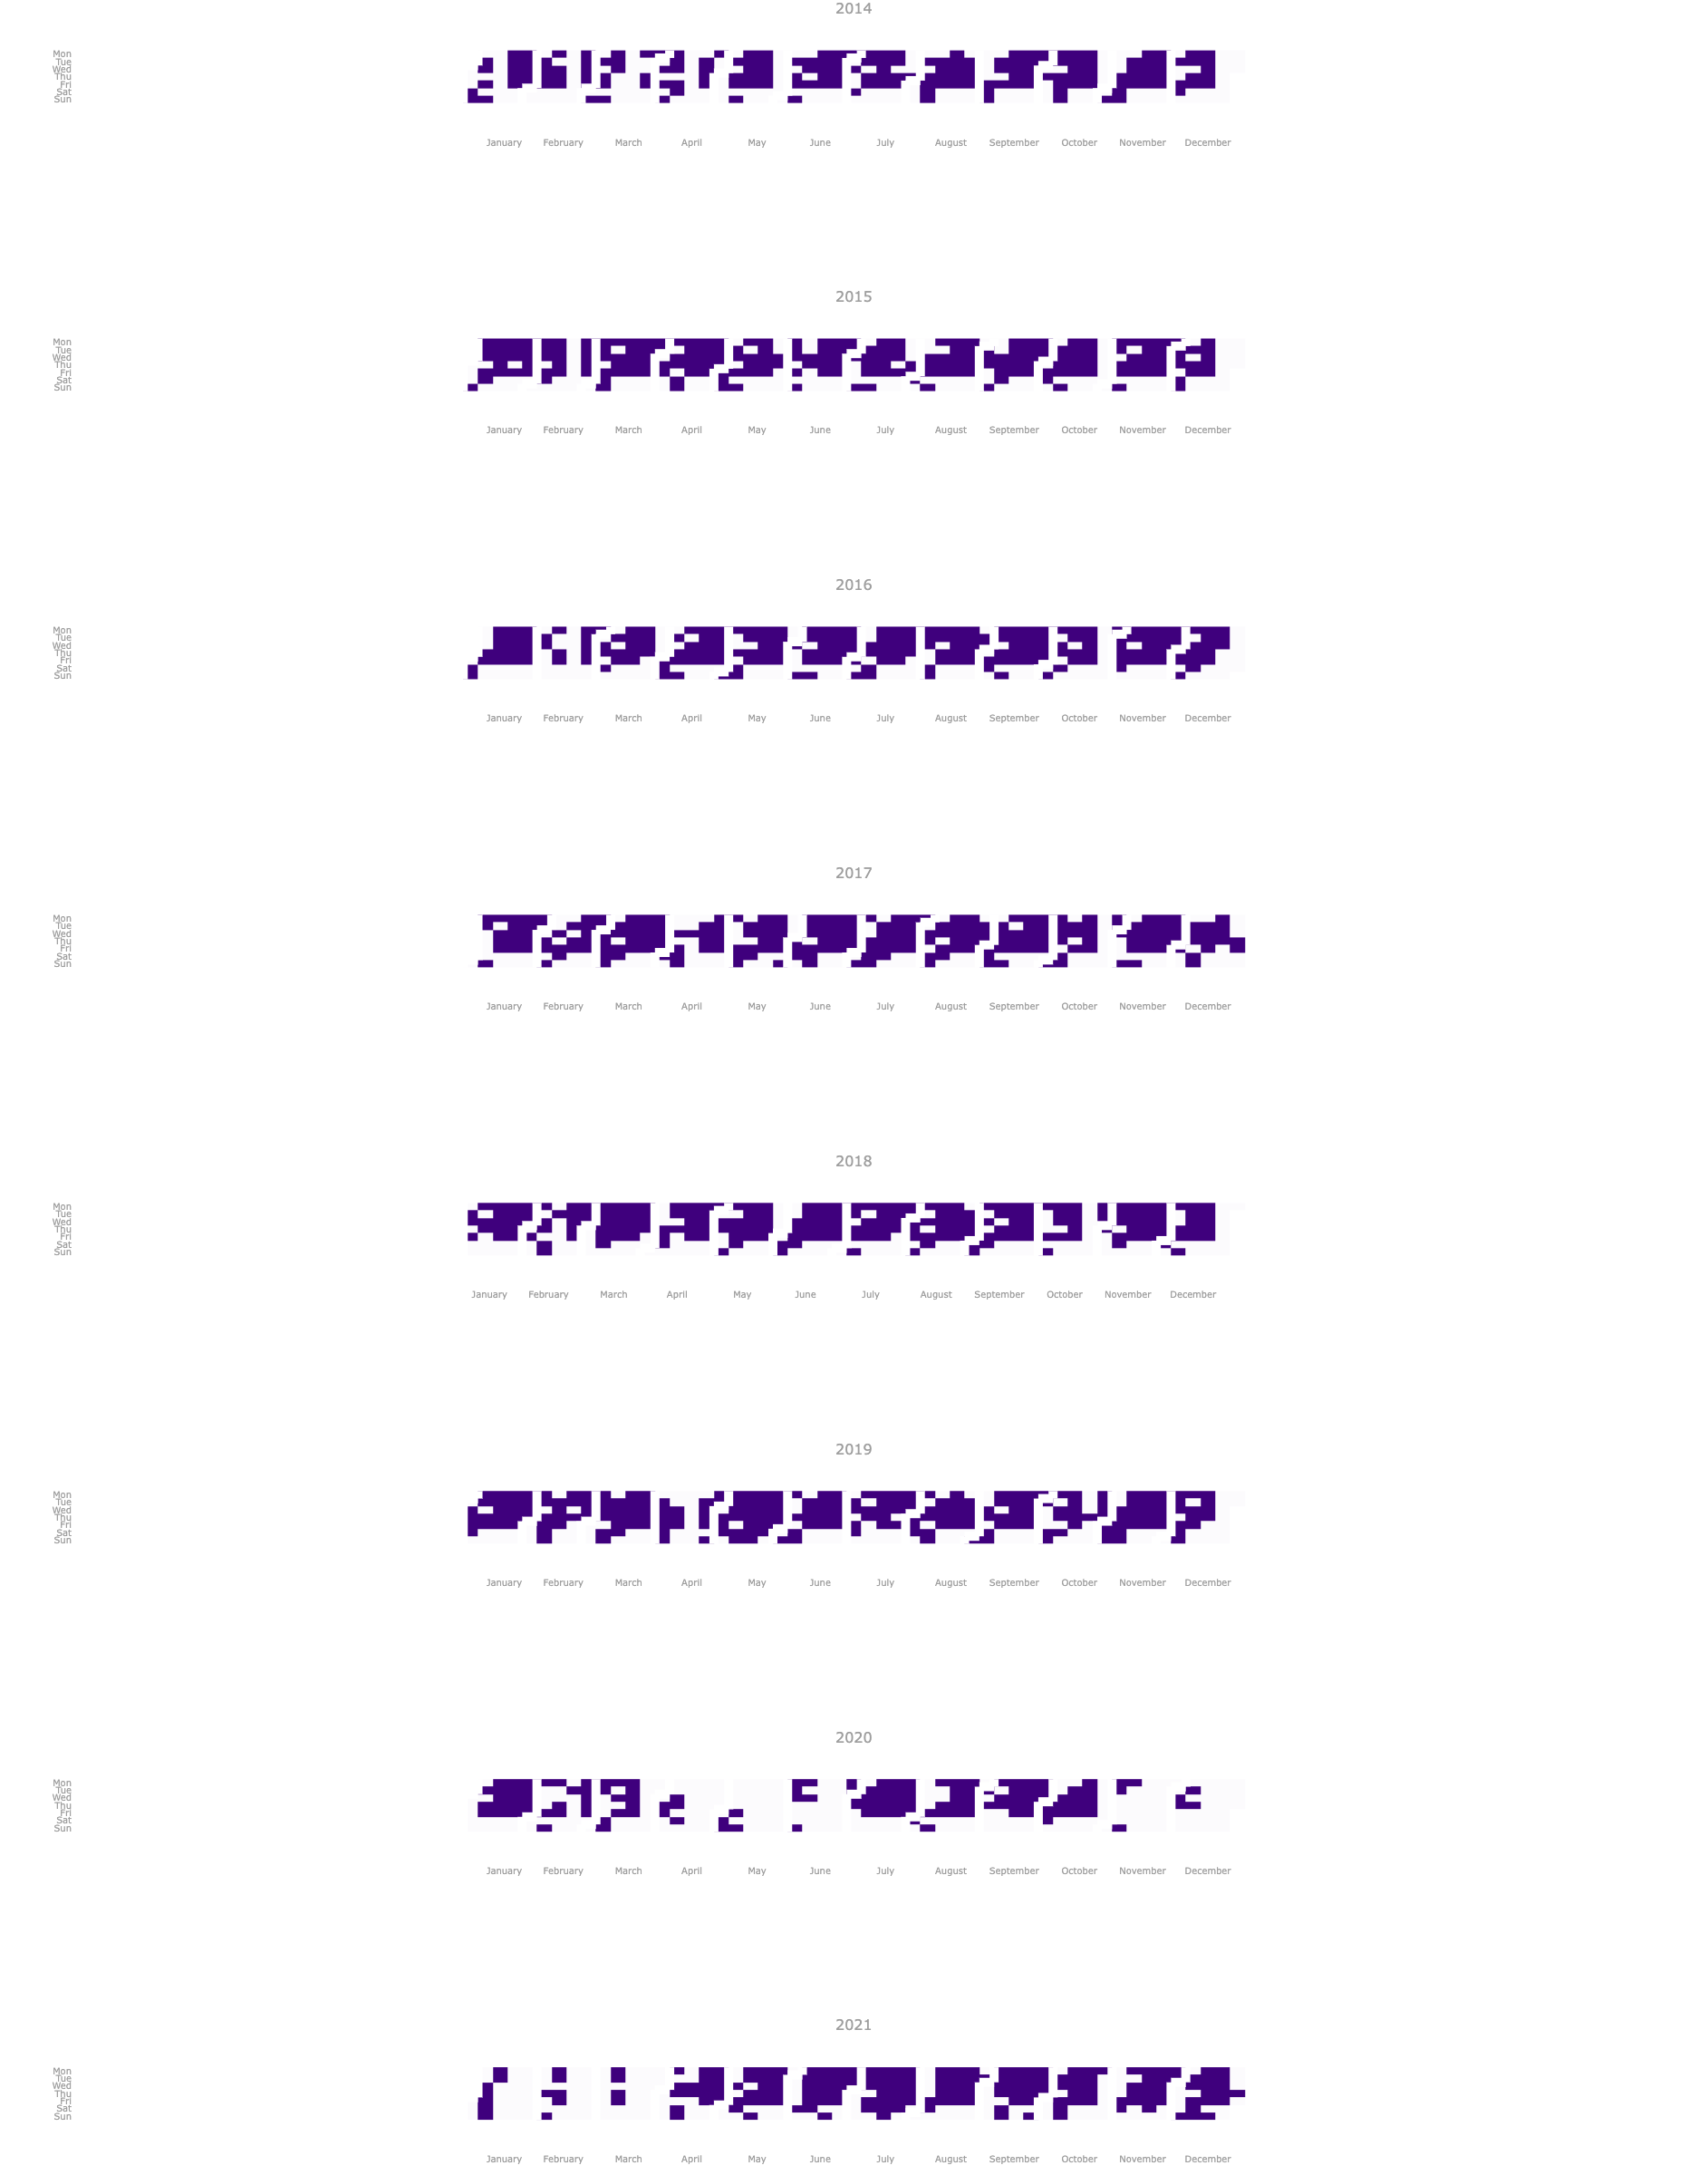

In [73]:
# Create Calplot Heatmap# creating the plot
fig = calplot(
    london_hd,
    x = "survey_date",
    y= "Value",
    dark_theme=False,
    years_title=True,
    colorscale="purples",
    gap=0,
    name="Data",
    month_lines_width=10, 
    month_lines_color="#fff"
)
fig.show()


### Separate London - Inner London

df[df['ids'].str.contains("ball")]## Prepare London data

In [4]:
# Check metadata
london_data.info()
# Change survey date to date format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1657376 entries, 0 to 1657375
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1657376 non-null  int64  
 1   site_id                     1657376 non-null  object 
 2   surveydescription           1657376 non-null  object 
 3   latitude                    1657376 non-null  float64
 4   longitude                   1657376 non-null  float64
 5   location                    1657376 non-null  object 
 6   borough                     1657376 non-null  object 
 7   functional_cycling_area     1657376 non-null  object 
 8   survey_year                 1657376 non-null  int64  
 9   survey_date                 1657376 non-null  object 
 10  weather                     1657376 non-null  object 
 11  time                        1657376 non-null  object 
 12  period                      1657376 non-null  object 
 1

In [5]:
# Convert necessary data columns into dates
# Remove duplicates
# Add another column and assign a value

In [6]:
# Check top 5 rows
london_data.head()

,Unnamed: 0,site_id,surveydescription,latitude,longitude,location,borough,functional_cycling_area,survey_year,survey_date,...,direction,number_of_male_cycles,number_of_female_cycles,number_of_unknown_cycles,total_cycles,day_of_week,month,season,number_of_private_cycles,number_of_cycle_hire_bikes
0,0,CENCY001,Central area cycle surveys,51.492629,-0.125179,Millbank (south of Thorney Street),Westminster,Central,2014,2014-01-22,...,Northbound,NaN,NaN,NaN,9.0,Wednesday,1,Winter,7.0,2.0
1,1,CENCY001,Central area cycle surveys,51.492629,-0.125179,Millbank (south of Thorney Street),Westminster,Central,2014,2014-01-22,...,Southbound,NaN,NaN,NaN,10.0,Wednesday,1,Winter,8.0,2.0
2,2,CENCY001,Central area cycle surveys,51.492629,-0.125179,Millbank (south of Thorney Street),Westminster,Central,2014,2014-01-22,...,Northbound,NaN,NaN,NaN,11.0,Wednesday,1,Winter,11.0,0.0
3,3,CENCY001,Central area cycle surveys,51.492629,-0.125179,Millbank (south of Thorney Street),Westminster,Central,2014,2014-01-22,...,Southbound,NaN,NaN,NaN,9.0,Wednesday,1,Winter,8.0,1.0
4,4,CENCY001,Central area cycle surveys,51.492629,-0.125179,Millbank (south of Thorney Street),Westminster,Central,2014,2014-01-22,...,Northbound,NaN,NaN,NaN,12.0,Wednesday,1,Winter,11.0,1.0


In [7]:
# Convert Day to datetype
london_data['survey_date']= pd.to_datetime(london_data['survey_date'])
london_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1657376 entries, 0 to 1657375
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   Unnamed: 0                  1657376 non-null  int64         
 1   site_id                     1657376 non-null  object        
 2   surveydescription           1657376 non-null  object        
 3   latitude                    1657376 non-null  float64       
 4   longitude                   1657376 non-null  float64       
 5   location                    1657376 non-null  object        
 6   borough                     1657376 non-null  object        
 7   functional_cycling_area     1657376 non-null  object        
 8   survey_year                 1657376 non-null  int64         
 9   survey_date                 1657376 non-null  datetime64[ns]
 10  weather                     1657376 non-null  object        
 11  time                    

In [309]:
# Remove duplicates by year
london_data = london_data.drop_duplicates(subset=['survey_date'])

In [9]:
london_data['Value'] = 1

In [10]:
london_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52621 entries, 3136 to 1656351
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  52621 non-null  int64         
 1   site_id                     52621 non-null  object        
 2   surveydescription           52621 non-null  object        
 3   latitude                    52621 non-null  float64       
 4   longitude                   52621 non-null  float64       
 5   location                    52621 non-null  object        
 6   borough                     52621 non-null  object        
 7   functional_cycling_area     52621 non-null  object        
 8   survey_year                 52621 non-null  int64         
 9   survey_date                 52621 non-null  datetime64[ns]
 10  weather                     52621 non-null  object        
 11  time                        52621 non-null  objec

In [11]:
london_data.shape

(52621, 25)

In [ ]:
london_data.to_csv('london4heatmaps16102022.csv', index = False)

In [19]:
# Extract columns needed for heatmap London
london_data = london_data[['survey_date','Value']]
london_data.head()

,survey_date,Value
0,2014-01-22,1
64,2014-01-24,1
128,2014-06-18,1
192,2014-06-20,1
256,2014-09-15,1


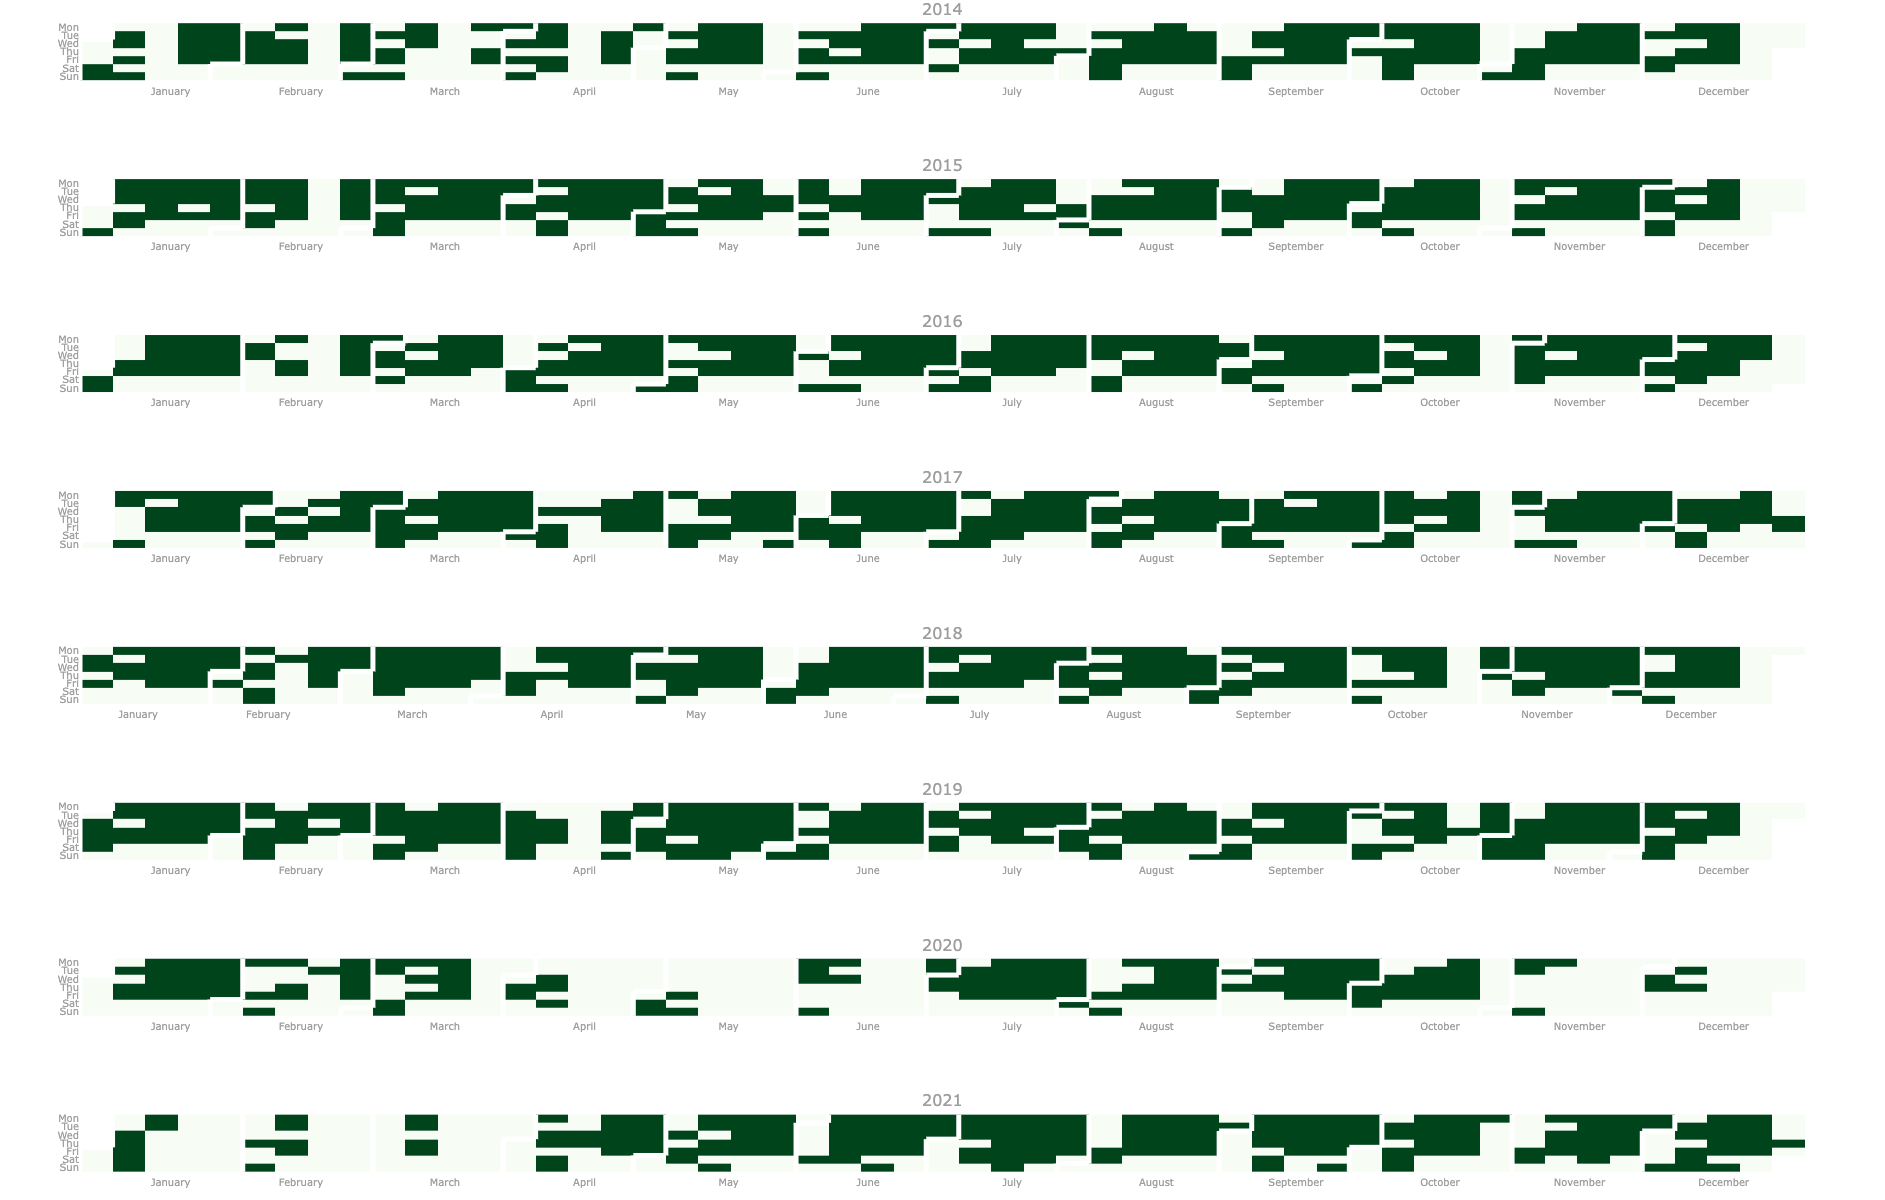

<Figure size 648x432 with 0 Axes>

In [52]:
# creating the plot

fig = calplot(
        london_data,
        x = "survey_date",
        y= "Value",
        gap = 0,
        name="Dates Covered",
        month_lines_width=5, 
        month_lines_color="#fff",
        years_title = True
        
        )
fig.show()

### Separate London - Outer London

In [25]:
# Load file into dataframe
outer_london = pd.read_csv('outer_london_V16102022.csv')

In [26]:
outer_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375659 entries, 0 to 375658
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  375659 non-null  int64  
 1   site_id                     375659 non-null  object 
 2   surveydescription           375659 non-null  object 
 3   latitude                    375659 non-null  float64
 4   longitude                   375659 non-null  float64
 5   location                    375659 non-null  object 
 6   borough                     375659 non-null  object 
 7   functional_cycling_area     375659 non-null  object 
 8   survey_year                 375659 non-null  int64  
 9   survey_date                 375659 non-null  object 
 10  weather                     375659 non-null  object 
 11  time                        375659 non-null  object 
 12  period                      375659 non-null  object 
 13  direction     

In [27]:
# Convert Day to datetype
outer_london['survey_date']= pd.to_datetime(outer_london['survey_date'])

In [28]:
# Remove duplicates by year
outer_london = outer_london.drop_duplicates(subset=['survey_date'])

In [29]:
# The date is assigned a value to indicate that a cycle count had been recorded
outer_london['Value'] = 1

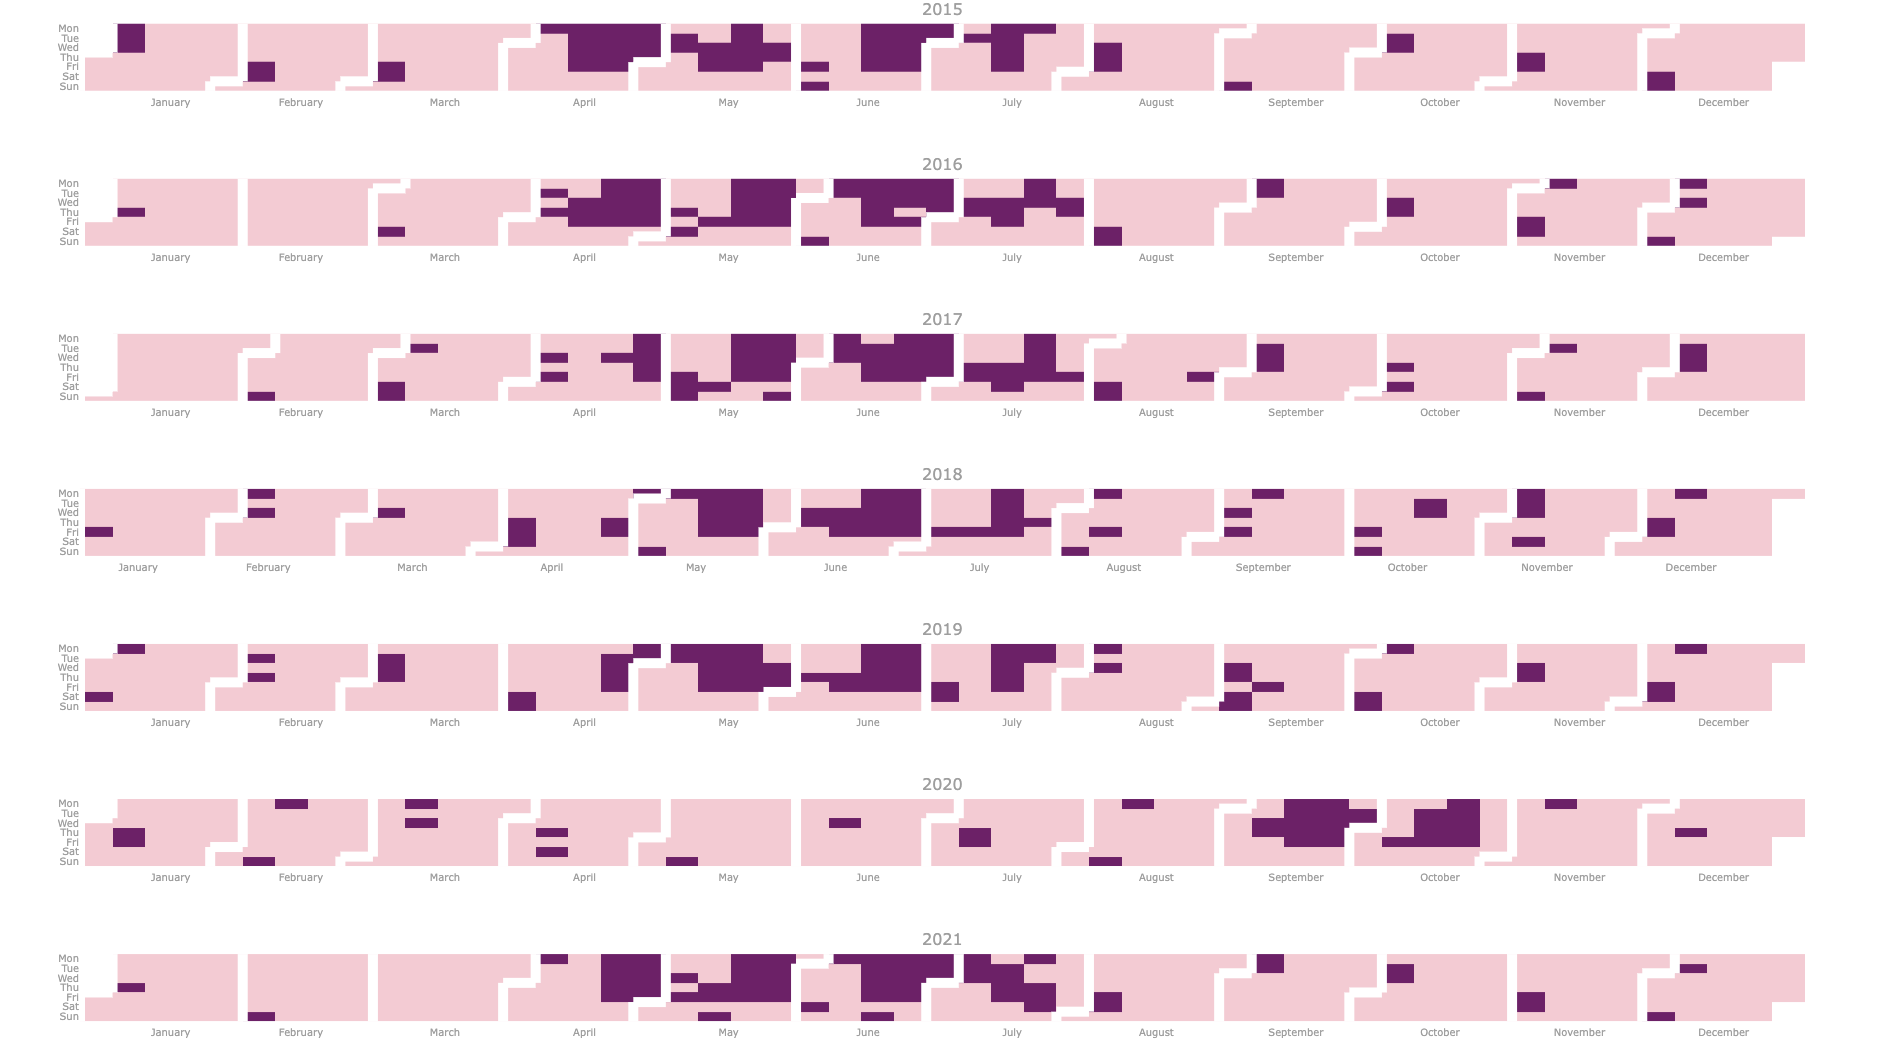

In [30]:
# Create Calplot Heatmap# creating the plot
fig = calplot(
    outer_london,
    x = "survey_date",
    y= "Value",
    dark_theme=False,
    years_title=True,
    colorscale="magenta",
    gap=0,
    name="Outer London by Day",
    month_lines_width=10, 
    month_lines_color="#fff"
)
fig.show()

### Separate London - Central London

In [31]:
# Load file into dataframe
central_london = pd.read_csv('central_london_V16102022.csv')

In [32]:
central_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758099 entries, 0 to 758098
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  758099 non-null  int64  
 1   site_id                     758099 non-null  object 
 2   surveydescription           758099 non-null  object 
 3   latitude                    758099 non-null  float64
 4   longitude                   758099 non-null  float64
 5   location                    758099 non-null  object 
 6   borough                     758099 non-null  object 
 7   functional_cycling_area     758099 non-null  object 
 8   survey_year                 758099 non-null  int64  
 9   survey_date                 758099 non-null  object 
 10  weather                     758099 non-null  object 
 11  time                        758099 non-null  object 
 12  period                      758099 non-null  object 
 13  direction     

In [33]:
# Convert Day to datetype
central_london['survey_date']= pd.to_datetime(central_london['survey_date'])

In [34]:
# Remove duplicates by year
central_london = central_london.drop_duplicates(subset=['survey_date'])

In [35]:
# The date is assigned a value to indicate that a cycle count had been recorded
central_london['Value'] = 1

In [ ]:
# Create Calplot Heatmap# creating the plot
fig = calplot(
    central_london,
    x = "survey_date",
    y= "Value",
    dark_theme=False,
    years_title=True,
    colorscale="oranges",
    gap=0,
    name="Outer London by Day",
    month_lines_width=10, 
    month_lines_color="#fff"
)
fig.show()

## New York by Day

In [4]:
NY_byday = pd.read_csv('NYbyDay4heatmaps16102022.csv')

In [5]:
NY_byday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3595 entries, 0 to 3594
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date_only  3595 non-null   object
 1   Value      3595 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 56.3+ KB


In [6]:
NY_byday['date_only']= pd.to_datetime(NY_byday['date_only'])

In [ ]:
# Create Calplot Heatmap# creating the plot
fig = calplot(
    NY_byday,
    x = "date_only",
    y= "Value",
    dark_theme=False,
    years_title=True,
    colorscale="greens",
    gap=0,
    name="Data",
    month_lines_width=10, 
    month_lines_color="#fff"
)
fig.show()

# By day it looks as though the data is complete (from September 2012)
# Digging into counts by the hour it looks like there are many irregularities

### New York by Day

### New York by Hour

In [68]:
NY_hd_weightedHour.head()
NY_hd_weightedHour['date_only']= pd.to_datetime(NY_hd_weightedHour['date_only'])

In [ ]:
fig = calplot(
    NY_hd_weightedHour,
    x = "date_only",
    y= "Hour_Weighted",
    dark_theme=False,
    years_title=True,
    colorscale="greens",
    gap= 0,
    name="New York Hours Cycling is Recorded by Day",
    month_lines_width=2, 
    month_lines_color="#00A344"
)
fig.show()

# Here you can see irregularities in the data being recorded during the day.  No patterns can be seen at this macro level.
# Is downtime for site counts recorded?